## Task:  classify origin of wine based on physio-chemical analysis data. 

You are provided data that are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Details can be [**found here**](http://archive.ics.uci.edu/ml/datasets/Wine).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data 

#### Data set

In [2]:
df = pd.read_csv('../Data/wine.data.csv', header=None)
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Describe the basic statistics of the features

In [3]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Make boxplots by output labels/classes - do any features classify the wine based on these figures?

If so (and hint, they do!), make a scatter plot showing the correlation of two features showing the correlation of two features and class separation by these features

In [4]:
df.shape
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

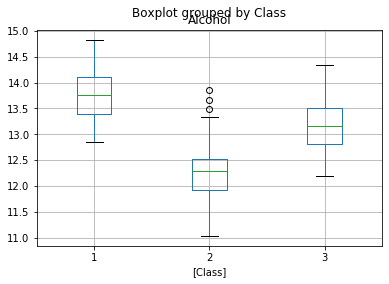

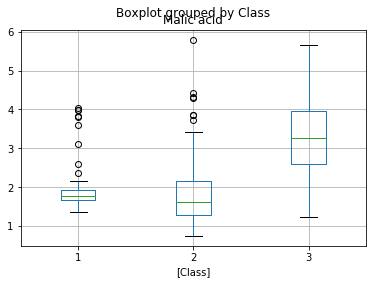

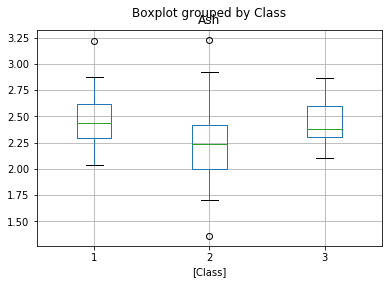

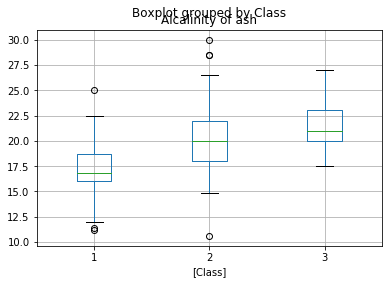

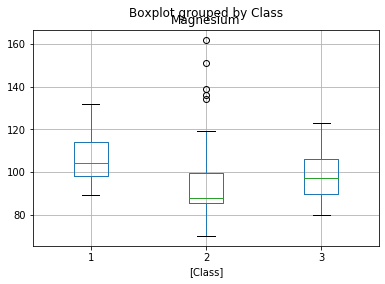

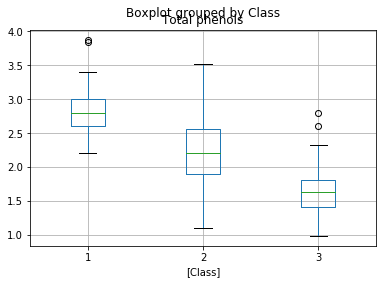

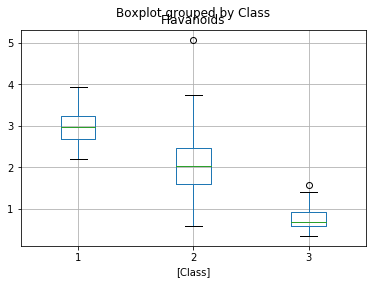

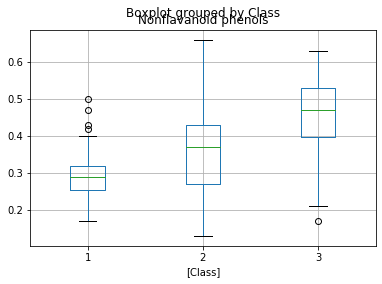

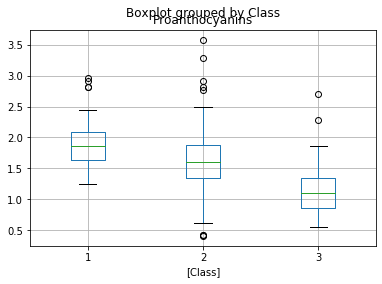

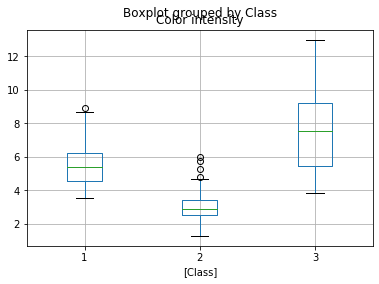

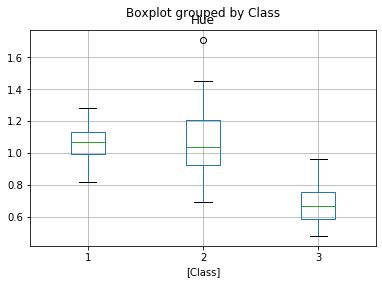

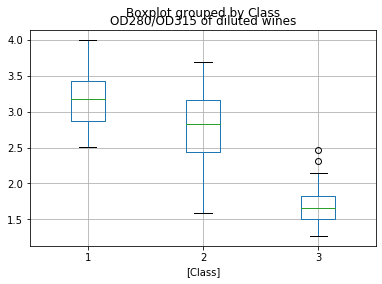

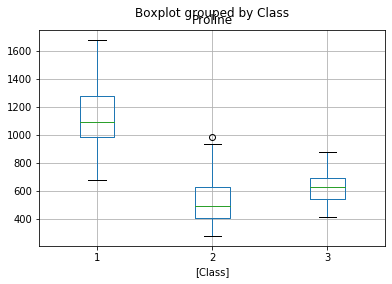

In [5]:
idx = np.arange(1,14)
for i in idx:
    df1 = df.iloc[:, [0, i]]
    df1.boxplot(by = 'Class')

In [6]:
import seaborn as sns; sns.set()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


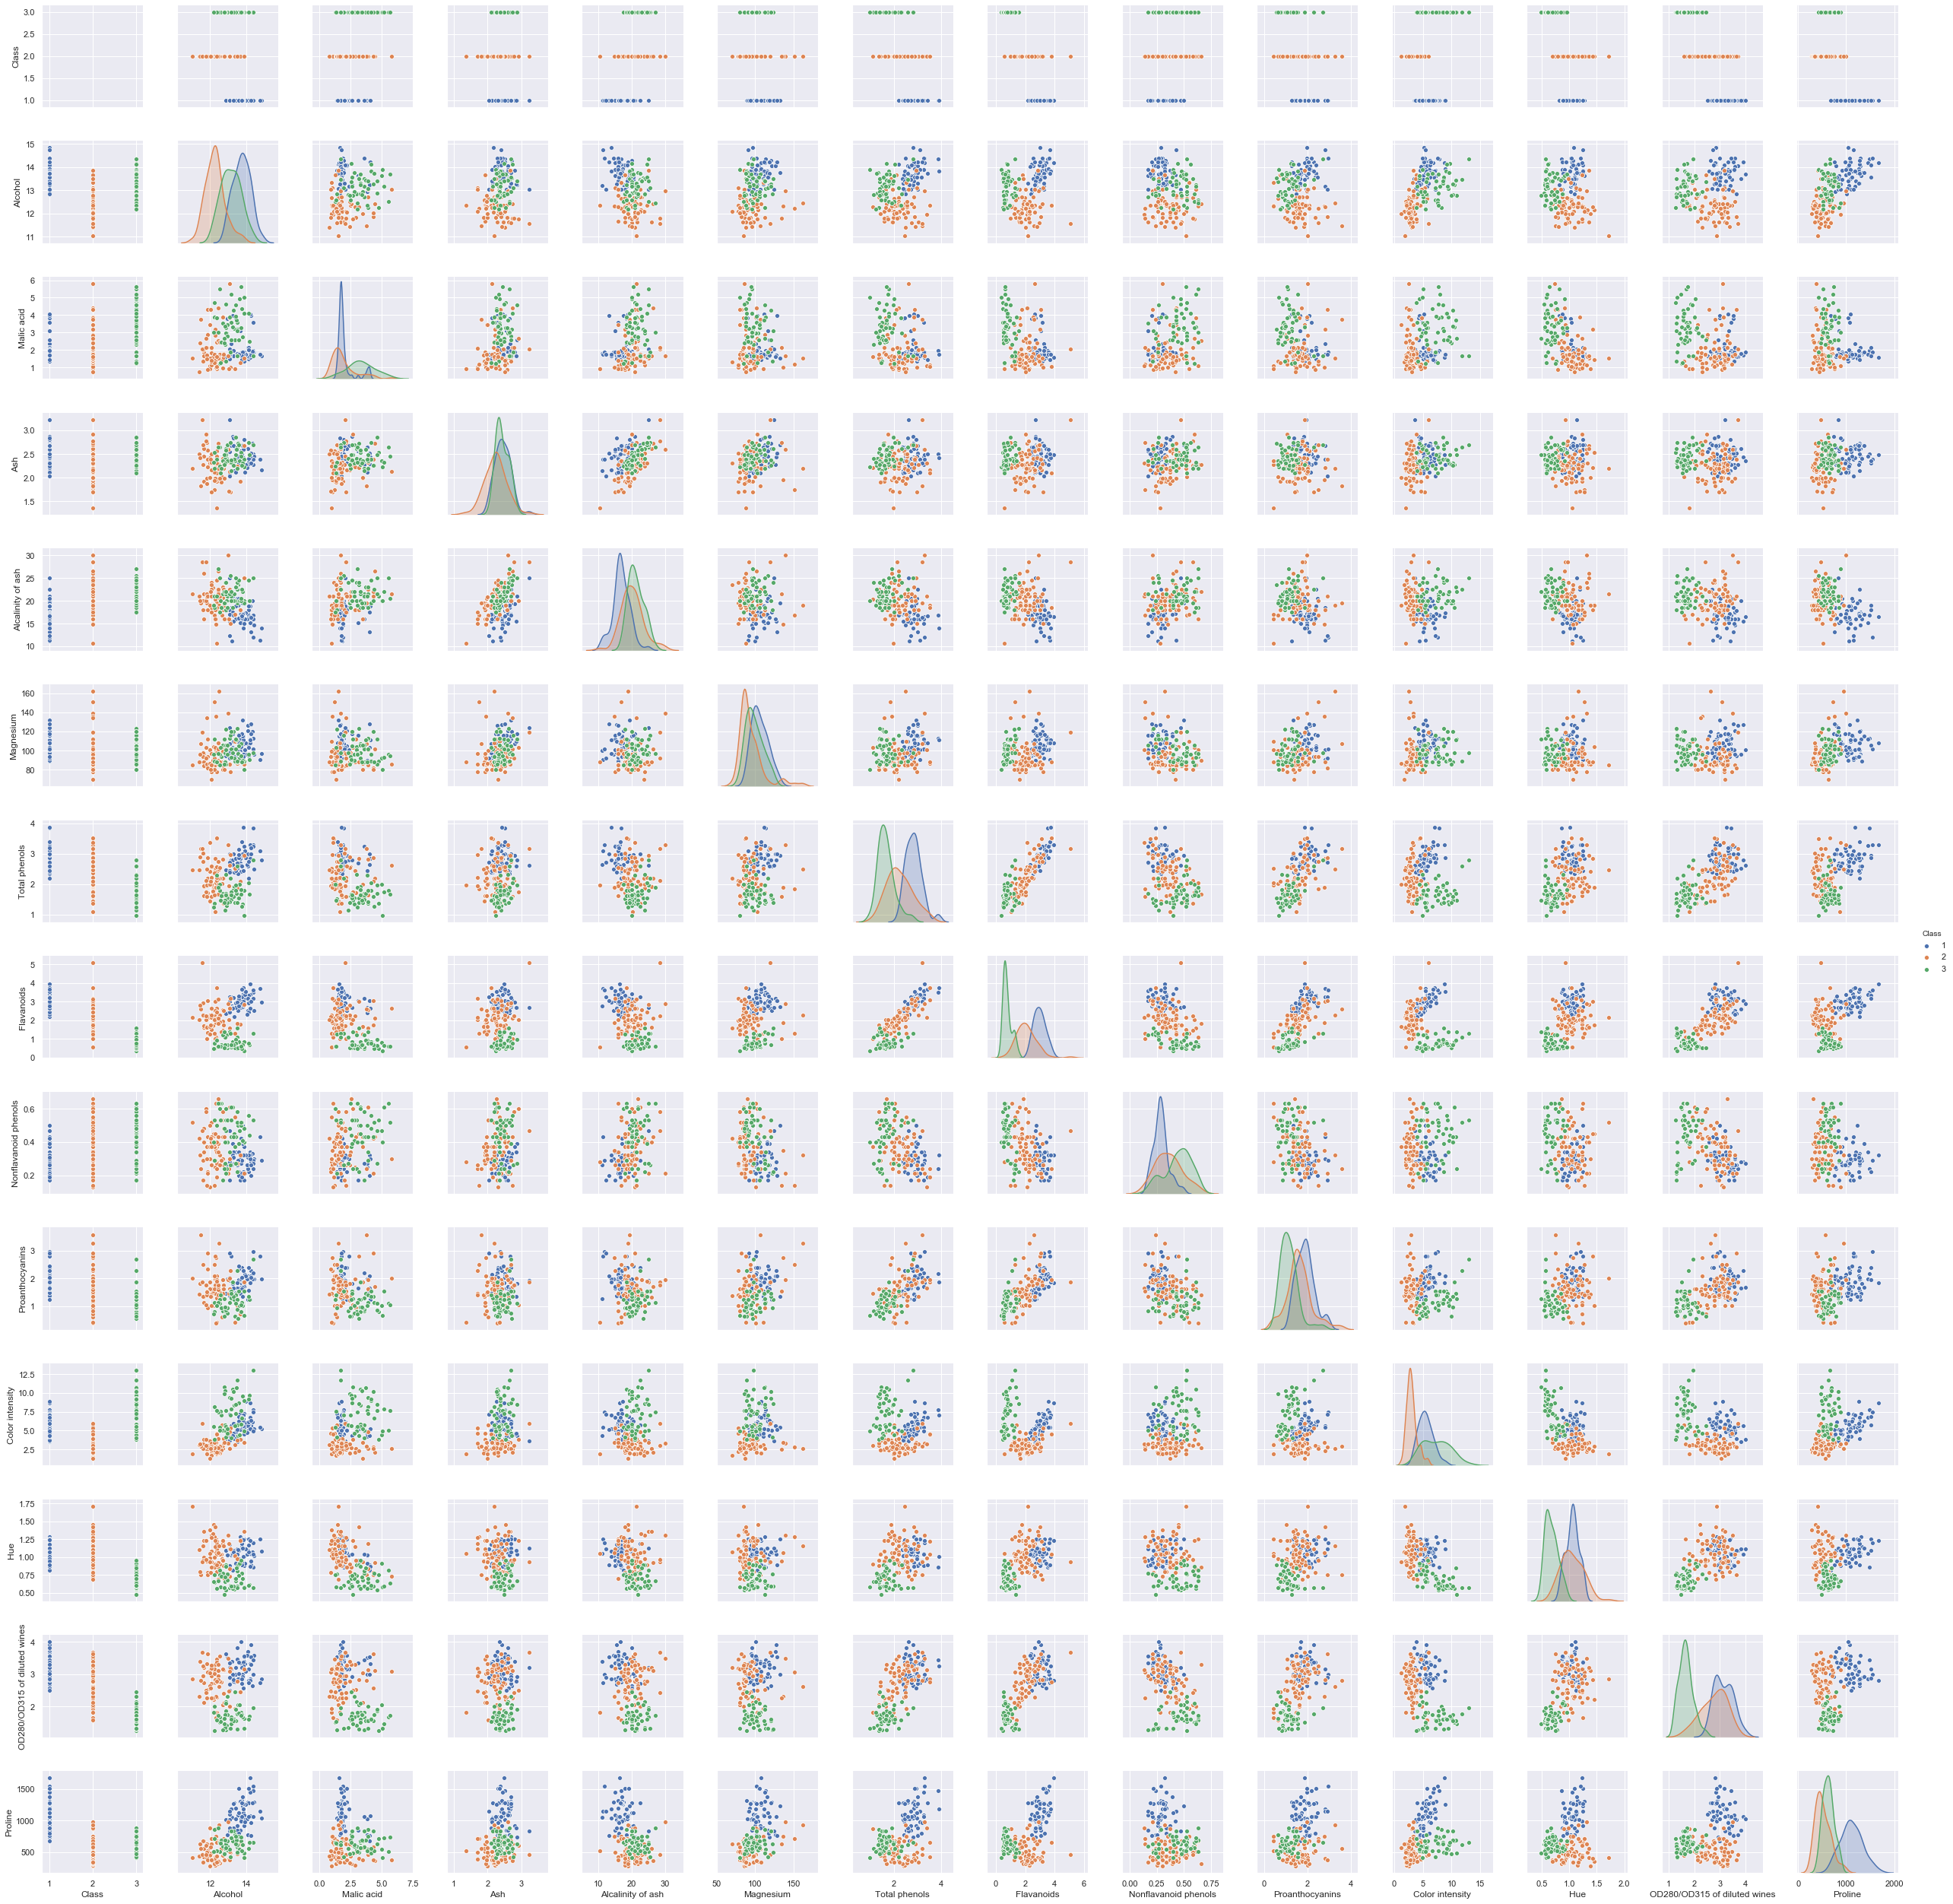

In [7]:
sns.pairplot(df, hue = 'Class', height = 2.5)

####  Naive Bayes Classification

Use [Naive Bayes Classification](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) to create a model to classify wine base on attributes.  Justify how good the model is for the wine classification.  Note that some of the metrics we've used in class are only for *binary* classifications, so may not eb applicable here.


In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [9]:
X = df.iloc[:, 1:14]
Y = df['Class']
print(X.shape)
print(Y.shape)

(178, 13)
(178,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 13)
(59, 13)
(119,)
(59,)


In [11]:
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
y_pred = Gnb.predict(X_test)
y_pred.shape

(59,)

In [13]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9661016949152542

In [14]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        26
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        13

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [15]:
cm = metrics.confusion_matrix(y_test, y_pred)
cmdf = pd.DataFrame(cm, index = ['0','1', '2'], columns = ['0', '1','2'])
cmdf

,0,1,2
0,24,0,0
1,2,20,0
2,0,0,13


### Discussion
From the classification report the win classification data has an accuracy of 97%, for each 100 win is classified, 97 were correctly classified. From the confusion matrix, the precision for class 1 and 3 were 100% and the precision for class 2 win is 91%. This classification metod has a better precision on class 1 and 3 win. 